# Experimentos con Dataset Disvoice + Edad y Sexo
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/EdadYSexo*
* Módulo de carga de datos: */src/cargaDatosEdSx.py*
     * Contiene load_....py siendo ... todos los conjuntos de datos extraidos para Disvoice + Edad y Sexo [18]
     
* **Se consiguen mejoras con RF + SKB - GS: RF sube hasta 80 AUC.**

* **El mejor resultado de los anteriores experimentos (VT+AdaBOOST), sigue siendo el mejor: AUC 0.888. En este caso el mejor experimento se logra con el mismo proceso y se obtiene el mismo resultado practicamente: AUC 0.884**

<a id="index"></a>
## Índice del notebook
1. [Repetición experimentos #1 con este Dataset](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [Grid Search \ Seleckt KBest + RF](#skrf)
 ----------------------

In [1]:
from cargaDatosEdSx import *
import cargaDatosEdSx
from extractorCcas import ExtractorCaracteristicas
from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

# 1. Todo igual a E1 <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
En General: mejoras muy pequeñas en muy pocos casos y por la mayoría igual o un poco peor.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [2]:
conjuntos = [x for x in os.listdir('CaracteristicasExtraidas/EdadYSexo') if x.endswith('npy')]

In [18]:
tipoDatos = "cargaDatosEdSx"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"art_rt",
        "ORIGIN": tipoDatos+".load_art_rt",
    },
    {
        "ID_DATA":"art_w_atleta",
        "ORIGIN":tipoDatos+".load_art_w_atleta",
    },
    {
        "ID_DATA":"art_w_braso",
        "ORIGIN":tipoDatos+".load_art_w_braso",
    },
    {
        "ID_DATA":"art_w_campana",
        "ORIGIN":tipoDatos+".load_art_w_campana",
    },
    {
        "ID_DATA":"art_w_gato",
        "ORIGIN":tipoDatos+".load_art_w_gato",
    },
    {
        "ID_DATA":"art_w_petaka",
        "ORIGIN":tipoDatos+".load_art_w_petaka",
    },
    {
        "ID_DATA":"fon_rt",
        "ORIGIN":tipoDatos+".load_fon_rt",
    },
    {
        "ID_DATA":"fon_v_A",
        "ORIGIN":tipoDatos+".load_fon_v_A",
    },
    {
        "ID_DATA":"fon_v_E",
        "ORIGIN":tipoDatos+".load_fon_v_E",
    },
    {
        "ID_DATA":"fon_v_I",
        "ORIGIN":tipoDatos+".load_fon_v_I",
    },
    {
        "ID_DATA":"fon_v_O",
        "ORIGIN":tipoDatos+".load_fon_v_O",
    },
    {
        "ID_DATA":"fon_v_U",
        "ORIGIN":tipoDatos+".load_fon_v_U",
    },
    {
        "ID_DATA":"fon_w_atleta",
        "ORIGIN":tipoDatos+".load_fon_w_atleta",
    },
    {
        "ID_DATA":"fon_w_braso",
        "ORIGIN":tipoDatos+".load_fon_w_braso",
    },
    {
        "ID_DATA":"fon_w_campana",
        "ORIGIN":tipoDatos+".load_fon_w_campana",
    },
    {
        "ID_DATA":"fon_w_gato",
        "ORIGIN":tipoDatos+".load_fon_w_gato",
    },
    {
        "ID_DATA":"fon_w_petaka",
        "ORIGIN":tipoDatos+".load_fon_w_petaka",
    },
    {
        "ID_DATA":"prs_rt",
        "ORIGIN":tipoDatos+".load_prs_rt",
    }

]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [19]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [5]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.410000,0.590000,0.650000,0.500000,0.650000,0.700000,0.560000,0.690000
art_w_atleta,0.660000,0.550000,0.590000,0.500000,0.530000,0.610000,0.550000,0.600000
art_w_braso,0.510000,0.590000,0.640000,0.520000,0.570000,0.520000,0.480000,0.590000
art_w_campana,0.570000,0.610000,0.640000,0.480000,0.580000,0.650000,0.480000,0.600000
art_w_gato,0.520000,0.500000,0.640000,0.520000,0.670000,0.600000,0.460000,0.640000
art_w_petaka,0.510000,0.570000,0.650000,0.470000,0.550000,0.620000,0.470000,0.680000
fon_rt,0.520000,0.590000,0.590000,0.480000,0.570000,0.760000,0.630000,0.600000
fon_v_A,0.620000,0.580000,0.636667,0.563333,0.643333,0.616667,0.433333,0.616667
fon_v_E,0.550000,0.560000,0.640000,0.516667,0.630000,0.600000,0.520000,0.616667
fon_v_I,0.563333,0.560000,0.630000,0.520000,0.606667,0.610000,0.473333,0.626667


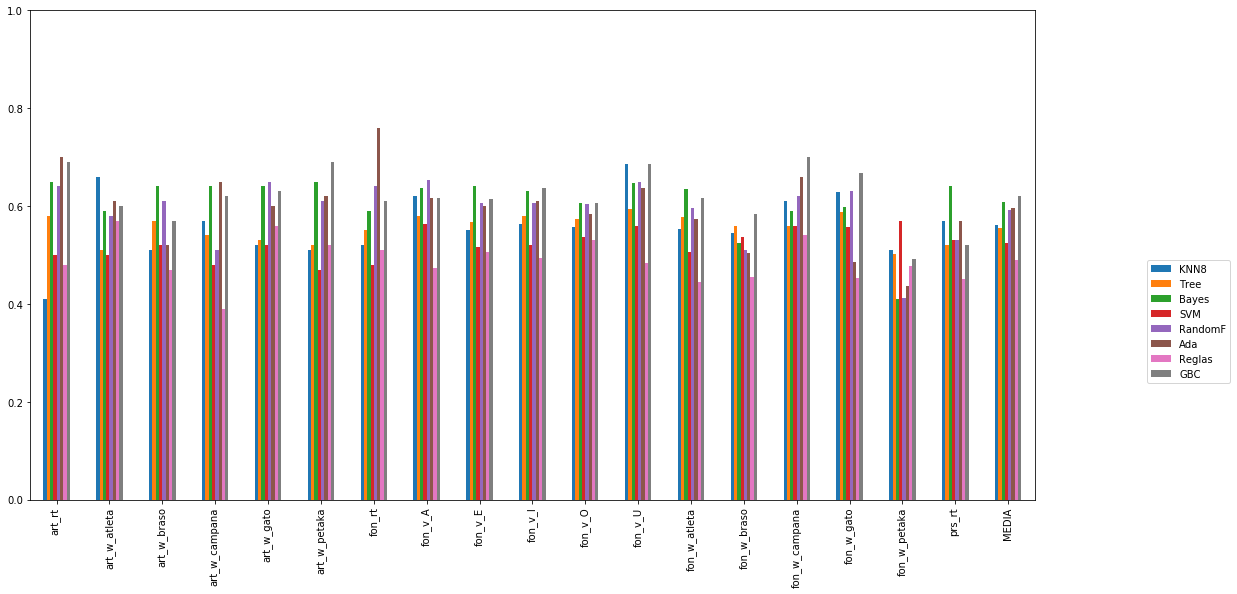

In [20]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [7]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [8]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.550000,0.590000,0.650000,0.630000,0.750000,0.700000,0.480000,0.690000
art_w_atleta,0.600000,0.520000,0.590000,0.550000,0.580000,0.610000,0.420000,0.610000
art_w_braso,0.560000,0.560000,0.640000,0.610000,0.500000,0.520000,0.490000,0.580000
art_w_campana,0.530000,0.540000,0.640000,0.570000,0.590000,0.650000,0.560000,0.610000
art_w_gato,0.640000,0.540000,0.640000,0.640000,0.640000,0.600000,0.480000,0.640000
art_w_petaka,0.580000,0.550000,0.650000,0.580000,0.570000,0.620000,0.540000,0.680000
fon_rt,0.540000,0.530000,0.590000,0.490000,0.690000,0.760000,0.450000,0.610000
fon_v_A,0.593333,0.573333,0.636667,0.620000,0.646667,0.613333,0.490000,0.623333
fon_v_E,0.600000,0.553333,0.640000,0.633333,0.620000,0.600000,0.476667,0.620000
fon_v_I,0.633333,0.583333,0.630000,0.623333,0.626667,0.610000,0.490000,0.630000


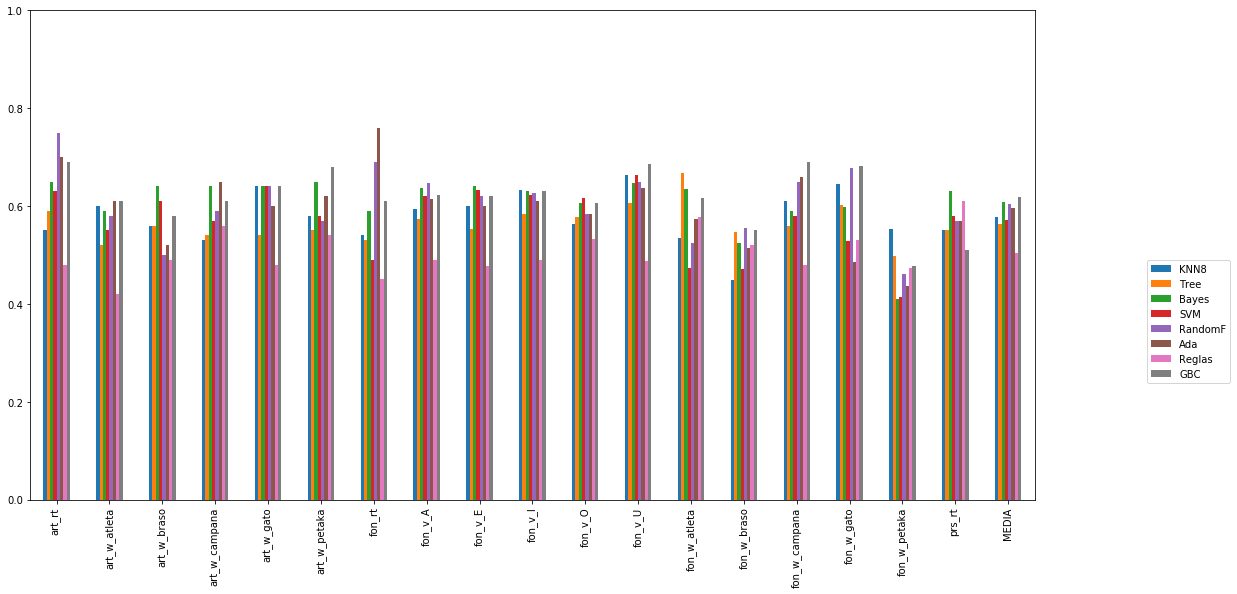

In [9]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [10]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [11]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.466000,0.550000,0.694000,0.596000,0.686000,0.784000,0.470000,0.740000
art_w_atleta,0.696000,0.540000,0.640000,0.526000,0.702000,0.708000,0.480000,0.676000
art_w_braso,0.520000,0.610000,0.692000,0.506000,0.652000,0.536000,0.440000,0.652000
art_w_campana,0.594000,0.560000,0.678000,0.530000,0.650000,0.696000,0.510000,0.684000
art_w_gato,0.574000,0.540000,0.672000,0.418000,0.658000,0.616000,0.480000,0.720000
art_w_petaka,0.562000,0.570000,0.716000,0.544000,0.668000,0.616000,0.480000,0.712000
fon_rt,0.568000,0.570000,0.588000,0.504000,0.580000,0.836000,0.490000,0.676000
fon_v_A,0.604667,0.593333,0.685333,0.600222,0.658889,0.684444,0.566667,0.672000
fon_v_E,0.545333,0.583333,0.713556,0.517778,0.651556,0.640000,0.516667,0.655111
fon_v_I,0.552889,0.580000,0.668000,0.543556,0.645556,0.628889,0.523333,0.643111


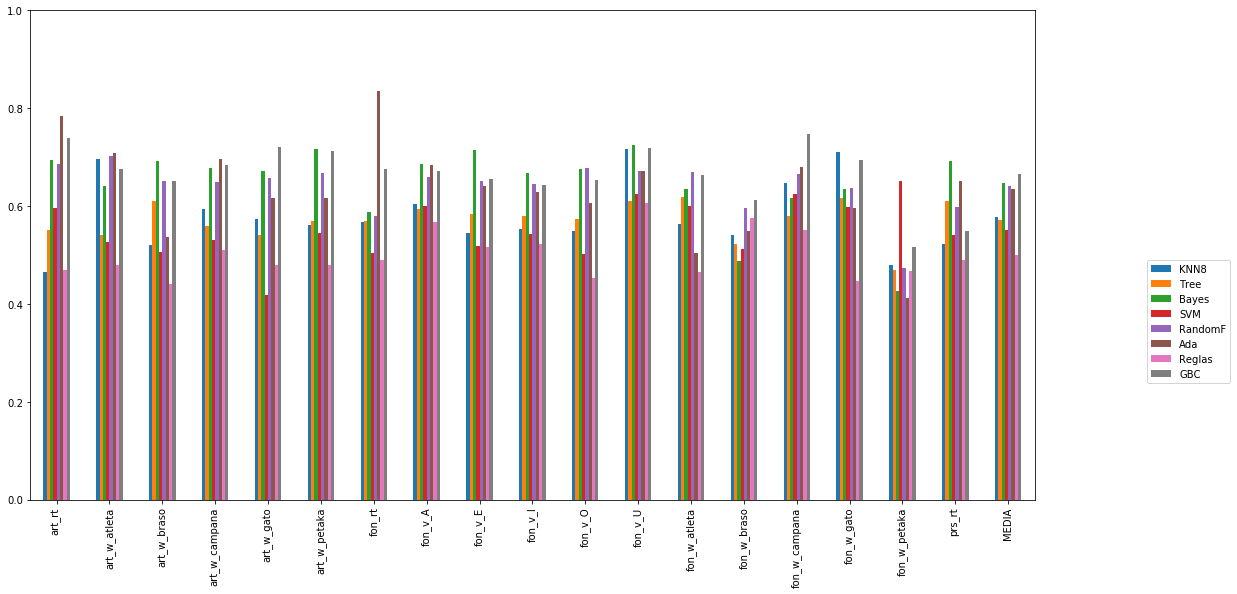

In [12]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [13]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [14]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.670000,0.530000,0.694000,0.756000,0.704000,0.784000,0.470000,0.776000
art_w_atleta,0.658000,0.510000,0.640000,0.684000,0.618000,0.708000,0.550000,0.716000
art_w_braso,0.600000,0.570000,0.692000,0.672000,0.674000,0.536000,0.550000,0.652000
art_w_campana,0.542000,0.560000,0.674000,0.700000,0.596000,0.696000,0.510000,0.656000
art_w_gato,0.696000,0.560000,0.672000,0.672000,0.732000,0.612000,0.540000,0.704000
art_w_petaka,0.630000,0.570000,0.716000,0.704000,0.594000,0.616000,0.490000,0.696000
fon_rt,0.568000,0.550000,0.588000,0.452000,0.566000,0.836000,0.530000,0.676000
fon_v_A,0.636667,0.590000,0.684889,0.673778,0.686222,0.679556,0.536667,0.663556
fon_v_E,0.599778,0.580000,0.713556,0.706222,0.643333,0.638667,0.490000,0.669333
fon_v_I,0.694222,0.596667,0.668000,0.677333,0.677556,0.628889,0.513333,0.641333


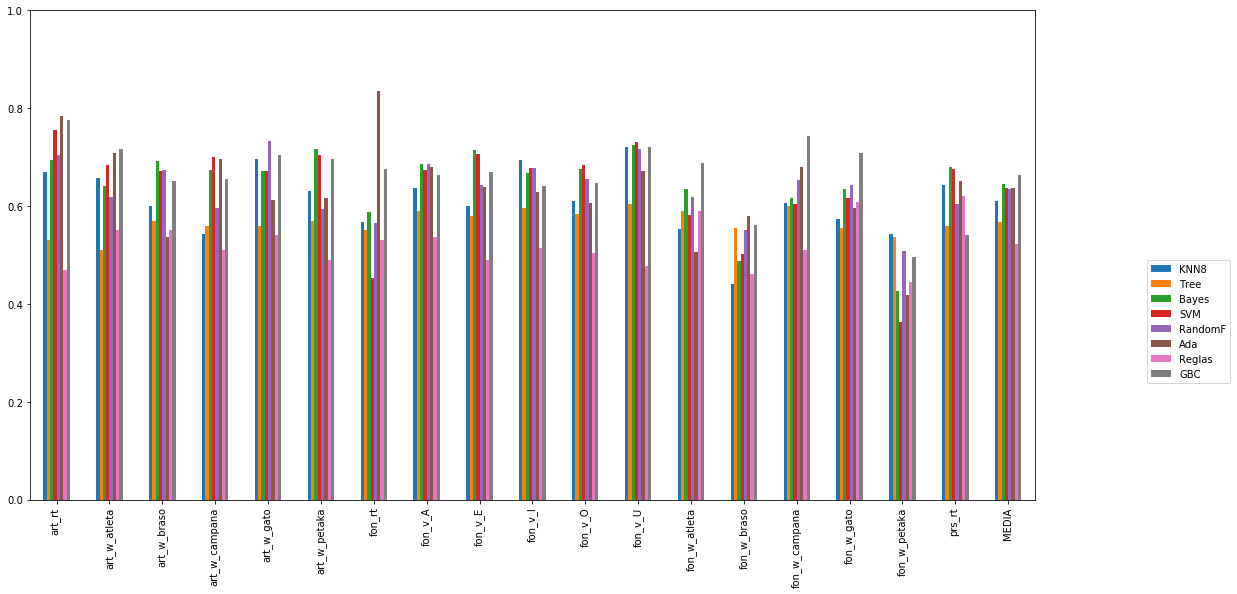

In [15]:
ex.process_results(all_results, data_names, model_names, 'bar')

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Explicada las funciones, parámetros devueltos y funcionamiento del experimento en notebooks anteriores y documentación de la calse. Experimento artículo 2016 Orozco: SVM con kernel gaussiano haciendo gridSearch de parámetros C y  𝛾  realizando 10-fold cross-validation. **Mejores resultados normalizando**. SCORING:AUC

In [42]:
def best_to_panda(mej):
    mejores_ordenados = [(mej[m]['score'], mej[m]['params'], m) for m in sorted(mej, key=lambda x: mej[x]['score'], reverse=True)]
    return pd.DataFrame(columns = ['score','params','dtst'], data=mejores_ordenados).set_index('dtst')

In [43]:
ex = Experimenter()

In [44]:
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,2000,5000,10000], 'kernel': ['rbf'], 'gamma' : [1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosEdSx,svm.SVC(),param_grid, verbose=False, normalizar=True)

In [45]:
best_to_panda(bestsOrz)

,score,params
dtst,,
fon_v_U,0.735111,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_w_campana,0.712000,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}"
prs_rt,0.702000,"{'C': 1, 'gamma': 500, 'kernel': 'rbf'}"
fon_v_I,0.688889,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}"
art_w_atleta,0.680000,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_w_gato,0.662281,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_v_E,0.660444,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
art_rt,0.656000,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_v_A,0.643111,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"


**¿Sobreajuste?** ¿Por qué puede darse?

In [46]:
print(bestsOrz['fon_v_U']['results']['split0_train_score'])
print(bestsOrz['fon_v_U']['results']['split0_test_score'])

[0.91056241 0.99961591 1.         1.         1.         1.
 1.         1.         0.99303155 1.         1.         1.
 1.         1.         1.         1.         0.99780521 1.
 1.         1.         1.         1.         1.         1.
 0.99983539 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[0.61333333 0.48888889 0.54222222 0.53555556 0.50888889 0.49777778
 0.54666667 0.5        0.57777778 0.49777778 0.56444444 0.535

## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING = AUC

In [35]:
modulo = cargaDatosEdSx

In [36]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        sc = MinMaxScaler()
        X = sc.fit(X).transform(X) if clsf != 'AdaBoostClassifier' else X #Comentar para no normalizar
        params = 'chi2, K=19' if selector == 'SelectKBest' else ''
        params = 'threshold=(0.1)' if selector == 'VarianceThreshold' and clsf == 'AdaBoostClassifier' else ''
        estimators = [('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [37]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.760000,0.748000,0.756000,0.716000
art_w_atleta,0.672000,0.672000,0.684000,0.608000
art_w_braso,0.544000,0.664000,0.672000,0.638000
art_w_campana,0.692000,0.684000,0.700000,0.652000
art_w_gato,0.616000,0.696000,0.672000,0.670000
art_w_petaka,0.600000,0.716000,0.704000,0.698000
fon_rt,0.884000,0.668000,0.452000,0.572000
fon_v_A,0.685778,0.666222,0.673778,0.658000
fon_v_E,0.652000,0.670667,0.706222,0.667556
fon_v_I,0.628889,0.636889,0.677333,0.648222


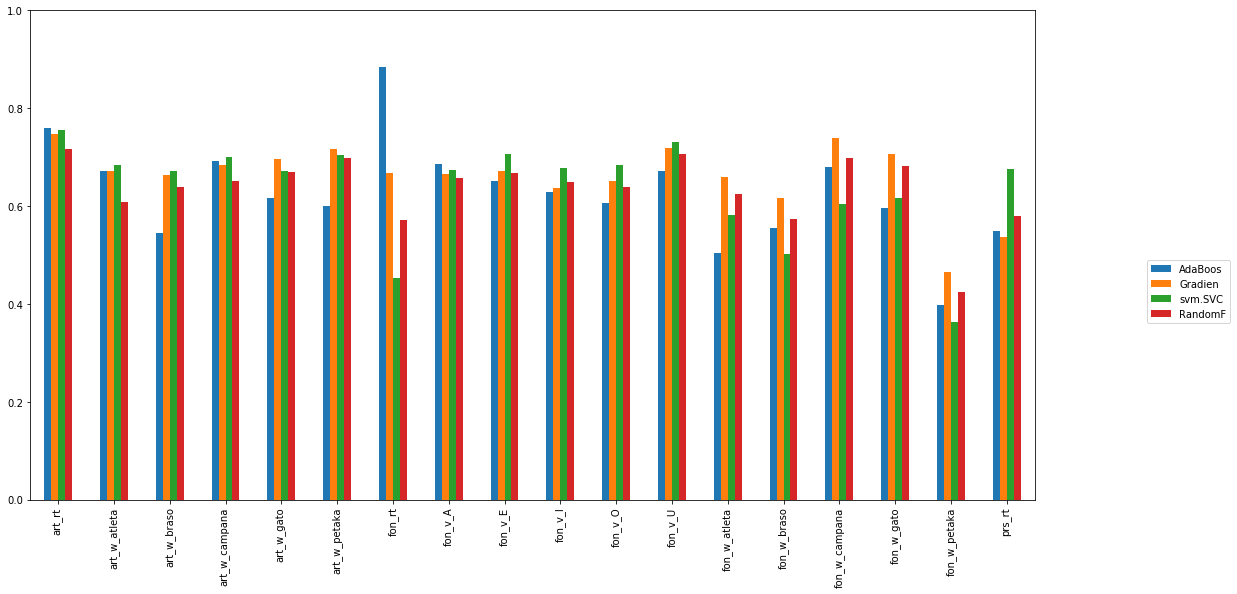

In [38]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [43]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(cargaDatosEdSx) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(cargaDatosEdSx, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(cargaDatosEdSx) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.666000,0.648000,0.756000,0.686000
art_w_atleta,0.556000,0.556000,0.712000,0.612000
art_w_braso,0.556000,0.544000,0.640000,0.582000
art_w_campana,0.570000,0.666000,0.660000,0.664000
art_w_gato,0.542000,0.632000,0.704000,0.662000
art_w_petaka,0.536000,0.496000,0.664000,0.534000
fon_rt,0.528000,0.600000,0.472000,0.568000
fon_v_A,0.665778,0.670667,0.727111,0.697111
fon_v_E,0.674444,0.686667,0.757778,0.686444
fon_v_I,0.659556,0.667111,0.740000,0.682222


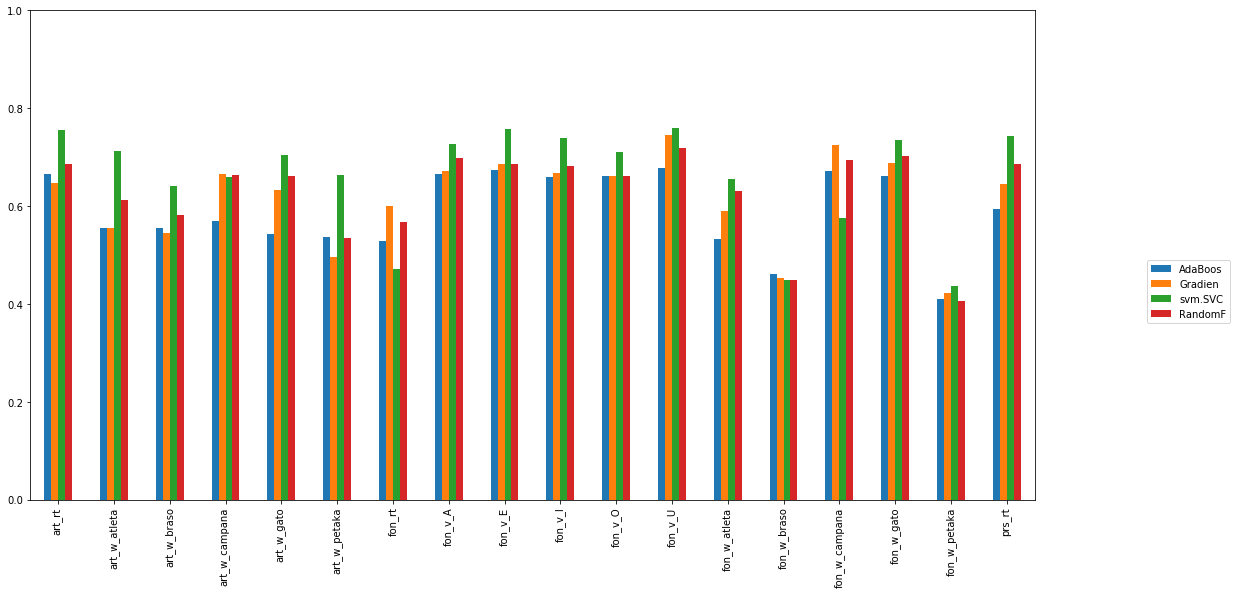

In [44]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Mejor resultado sin normalizar**. Fon_rt, VT:0.08. SCORING: AUC

In [3]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.01, 0.05, 0.08, 0.13, 0.16, 0.2 ])
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(cargaDatosEdSx, pip, param_grid, verbose=False, normalizar=False)

In [6]:
best_to_panda(bestsGsVtAda)

,score,params
dtst,,
fon_rt,0.884000,{'select__threshold': 0.08}
art_rt,0.756000,{'select__threshold': 0.05}
art_w_campana,0.736000,{'select__threshold': 0.2}
art_w_atleta,0.708000,{'select__threshold': 0.01}
fon_w_campana,0.688000,{'select__threshold': 0.16}
fon_v_A,0.685778,{'select__threshold': 0.13}
fon_v_U,0.676444,{'select__threshold': 0.13}
fon_v_E,0.652000,{'select__threshold': 0.08}
art_w_gato,0.648000,{'select__threshold': 0.16}


#### Normalizando

In [7]:

ex = Experimenter()
bestsGsVtAda = ex.GridSearchPipe(cargaDatosEdSx, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsVtAda)

,score,params
dtst,,
fon_rt,0.828000,{'select__threshold': 0.01}
art_rt,0.792000,{'select__threshold': 0.01}
art_w_gato,0.752000,{'select__threshold': 0.08}
art_w_atleta,0.704000,{'select__threshold': 0.01}
art_w_campana,0.700000,{'select__threshold': 0.01}
fon_w_campana,0.680000,{'select__threshold': 0.01}
fon_v_U,0.675556,{'select__threshold': 0.01}
fon_v_E,0.657333,{'select__threshold': 0.01}
fon_v_I,0.648889,{'select__threshold': 0.01}


## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado encontrado para RF. art_rt, AUC. Normalizando. 

{'clf__max_depth': 5,
 'clf__min_samples_leaf': 5,
 'clf__n_estimators': 25,
 'select__k': 22}

In [17]:
ex = Experimenter()
param_grid = dict(select__k=[5,10,15,22], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(cargaDatosEdSx, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsSkRfN)


------------------------
Dataset: art_rt
Los mejores parámetros encontrados son:

{'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 25, 'select__k': 22} - score: 0.8160000000000001

Rejilla de scores de cada una de las combinaciones de parámetros:
0.716 (+/-0.367) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.734 (+/-0.379) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.698 (+/-0.297) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.762 (+/-0.301) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.704 (+/-0.413) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.688 (+/-0.377) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.764 (+/-0.324) for {'clf__max_depth': 5, 'clf__min_s


------------------------
Dataset: art_w_braso
Los mejores parámetros encontrados son:

{'clf__max_depth': None, 'clf__min_samples_leaf': 3, 'clf__n_estimators': 10, 'select__k': 5} - score: 0.682

Rejilla de scores de cada una de las combinaciones de parámetros:
0.596 (+/-0.273) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.632 (+/-0.432) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.544 (+/-0.429) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.606 (+/-0.442) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.638 (+/-0.303) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.630 (+/-0.406) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.544 (+/-0.389) for {'clf__max_depth': 5, 'clf__min_samples


------------------------
Dataset: art_w_gato
Los mejores parámetros encontrados son:

{'clf__max_depth': 5, 'clf__min_samples_leaf': 10, 'clf__n_estimators': 10, 'select__k': 10} - score: 0.7080000000000001

Rejilla de scores de cada una de las combinaciones de parámetros:
0.674 (+/-0.346) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.586 (+/-0.293) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.590 (+/-0.275) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.682 (+/-0.352) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.640 (+/-0.320) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.620 (+/-0.277) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.628 (+/-0.273) for {'clf__max_depth': 5, 'clf__


------------------------
Dataset: fon_rt
Los mejores parámetros encontrados son:

{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22} - score: 0.7

Rejilla de scores de cada una de las combinaciones de parámetros:
0.492 (+/-0.398) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.592 (+/-0.426) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.644 (+/-0.449) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.468 (+/-0.308) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.516 (+/-0.287) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.616 (+/-0.500) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.604 (+/-0.548) for {'clf__max_depth': 5, 'clf__min_samples_leaf'


------------------------
Dataset: fon_v_E
Los mejores parámetros encontrados son:

{'clf__max_depth': None, 'clf__min_samples_leaf': 10, 'clf__n_estimators': 25, 'select__k': 15} - score: 0.7302222222222223

Rejilla de scores de cada una de las combinaciones de parámetros:
0.641 (+/-0.242) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.699 (+/-0.185) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.700 (+/-0.152) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.654 (+/-0.228) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.669 (+/-0.179) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.702 (+/-0.198) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.715 (+/-0.149) for {'clf__max_depth': 5, 'clf__


------------------------
Dataset: fon_v_O
Los mejores parámetros encontrados son:

{'clf__max_depth': None, 'clf__min_samples_leaf': 10, 'clf__n_estimators': 25, 'select__k': 10} - score: 0.7137777777777778

Rejilla de scores de cada una de las combinaciones de parámetros:
0.649 (+/-0.240) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.673 (+/-0.220) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.669 (+/-0.234) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.674 (+/-0.243) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.656 (+/-0.273) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.687 (+/-0.245) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.671 (+/-0.250) for {'clf__max_depth': 5, 'clf__


------------------------
Dataset: fon_w_atleta
Los mejores parámetros encontrados son:

{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22} - score: 0.6954545454545454

Rejilla de scores de cada una de las combinaciones de parámetros:
0.638 (+/-0.311) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.644 (+/-0.348) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.634 (+/-0.481) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.687 (+/-0.274) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.616 (+/-0.255) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.623 (+/-0.397) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.690 (+/-0.362) for {'clf__max_depth': 5, 'c


------------------------
Dataset: fon_w_campana
Los mejores parámetros encontrados son:

{'clf__max_depth': None, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 25, 'select__k': 22} - score: 0.7360000000000001

Rejilla de scores de cada una de las combinaciones de parámetros:
0.578 (+/-0.440) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.610 (+/-0.449) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.608 (+/-0.466) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.712 (+/-0.439) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.696 (+/-0.479) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.652 (+/-0.316) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.712 (+/-0.400) for {'clf__max_depth': 5, '


------------------------
Dataset: fon_w_petaka
Los mejores parámetros encontrados son:

{'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5} - score: 0.6208333333333333

Rejilla de scores de cada una de las combinaciones de parámetros:
0.621 (+/-0.490) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 5}
0.489 (+/-0.412) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 10}
0.517 (+/-0.429) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 15}
0.568 (+/-0.304) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10, 'select__k': 22}
0.577 (+/-0.328) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 5}
0.527 (+/-0.425) for {'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 25, 'select__k': 10}
0.406 (+/-0.327) for {'clf__max_depth': 5, 'clf__

,score,params
dtst,,
art_rt,0.816000,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
fon_w_gato,0.775219,"{'clf__max_depth': None, 'clf__min_samples_lea..."
fon_v_U,0.768889,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
fon_v_A,0.757778,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
fon_w_campana,0.736000,"{'clf__max_depth': None, 'clf__min_samples_lea..."
fon_v_I,0.732000,"{'clf__max_depth': None, 'clf__min_samples_lea..."
fon_v_E,0.730222,"{'clf__max_depth': None, 'clf__min_samples_lea..."
prs_rt,0.724000,"{'clf__max_depth': None, 'clf__min_samples_lea..."
fon_v_O,0.713778,"{'clf__max_depth': None, 'clf__min_samples_lea..."


**Depende de splits el roc es mucho mejor o mucho peor**: Si que puede significar que dependiendo de la estratificacion que se haga puedan mejorar mucho los resutlados.

In [29]:
print(bestsGsSkRfN['art_rt']['results']['split9_test_score'].mean())
print(bestsGsSkRfN['art_rt']['results']['split3_test_score'].mean())

0.3696875
0.930625


### Mejor resultado

In [41]:
datos = cargaDatosEdSx.load_fon_rt()
X = datos.data
y = datos.target
pip = Pipeline([('select', VarianceThreshold(0.08)),('clf', AdaBoostClassifier())])
cross_val_score(pip,X,y,cv=10,scoring='roc_auc').mean()

0.8840000000000001

# Igual a E1 pero ESTRATIFICANDO POR SEXO